In [8]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:


df = pd.read_csv("/content/aps_data.csv")

<ipython-input-10-2a2522f947d9>:1: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,28,29,30,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,68,69,70,71,81,82,83,85,100,101,102,103,104,105,106,107,108,109,112,114,115,116,117,118,119,120,121,122,123,143,159,160,161,162,163,164,165,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/aps_data.csv")


In [11]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [12]:
df.shape

(4212, 171)

In [13]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    1
ee_008    1
ee_009    1
ef_000    1
eg_000    1
Length: 171, dtype: int64

In [14]:
df = df.replace('na',np.nan)

In [15]:

df.isnull().sum()

class        0
aa_000       0
ab_000    3246
ac_000     261
ad_000    1034
          ... 
ee_007      52
ee_008      52
ee_009      52
ef_000     210
eg_000     210
Length: 171, dtype: int64

In [16]:
df.isnull().sum().sum()

60618

In [18]:
df.isnull().sum().sort_values(ascending = False)

br_000    3463
bq_000    3410
bp_000    3336
ab_000    3246
cr_000    3246
          ... 
cj_000      32
ci_000      32
bt_000      13
aa_000       0
class        0
Length: 171, dtype: int64

In [20]:
### Filling null values in feature with median of that feature
for feature in [feature for feature in df.columns if feature not in ['class']]:
    df[feature]=df[feature].fillna(df[feature].median())

In [22]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [24]:
X=df.drop("class",axis=1)
y=df["class"]

In [25]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  4212 non-null   int64 
 1    ab_000  4212 non-null   object
 2    ac_000  4212 non-null   object
 3    ad_000  4212 non-null   object
 4    ae_000  4212 non-null   object
 5    af_000  4212 non-null   object
 6    ag_000  4212 non-null   object
 7    ag_001  4212 non-null   object
 8    ag_002  4212 non-null   object
 9    ag_003  4212 non-null   object
 10   ag_004  4212 non-null   object
 11   ag_005  4212 non-null   object
 12   ag_006  4212 non-null   object
 13   ag_007  4212 non-null   object
 14   ag_008  4212 non-null   object
 15   ag_009  4212 non-null   object
 16   ah_000  4212 non-null   object
 17   ai_000  4212 non-null   object
 18   aj_000  4212 non-null   object
 19   ak_000  4212 non-null   object
 20   al_000  4212 non-null   object
 21   am_0    4212 non-null   object
 22 

In [26]:
y=pd.get_dummies(y,drop_first=True)

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3369, 170)
(843, 170)
(3369, 1)
(843, 1)


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [86]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
classifier=Sequential()

classifier.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu',input_dim =170))

classifier.add(Dense(units =8, kernel_initializer = 'he_uniform',activation='relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [98]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [99]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [100]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 16)                2736      
                                                                 
 dense_30 (Dense)            (None, 8)                 136       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_history=classifier.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
253/253 [==============================] - 3s 5ms/step - loss: 0.4377 - accuracy: 0.8286 - val_loss: 0.1570 - val_accuracy: 0.9597
Epoch 2/100
253/253 [==============================] - 2s 7ms/step - loss: 0.1055 - accuracy: 0.9770 - val_loss: 0.0897 - val_accuracy: 0.9727
Epoch 3/100
253/253 [==============================] - 1s 5ms/step - loss: 0.0528 - accuracy: 0.9846 - val_loss: 0.0751 - val_accuracy: 0.9798
Epoch 4/100
253/253 [==============================] - 1s 5ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0626 - val_accuracy: 0.9810
Epoch 5/100
253/253 [==============================] - 1s 5ms/step - loss: 0.0253 - accuracy: 0.9929 - val_loss: 0.0668 - val_accuracy: 0.9822
Epoch 6/100
253/253 [==============================] - 1s 5ms/step - loss: 0.0228 - accuracy: 0.9913 - val_loss: 0.0557 - val_accuracy: 0.9810
Epoch 7/100
253/253 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9937 - val_loss: 0.0849 - val_accuracy: 0.9786

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


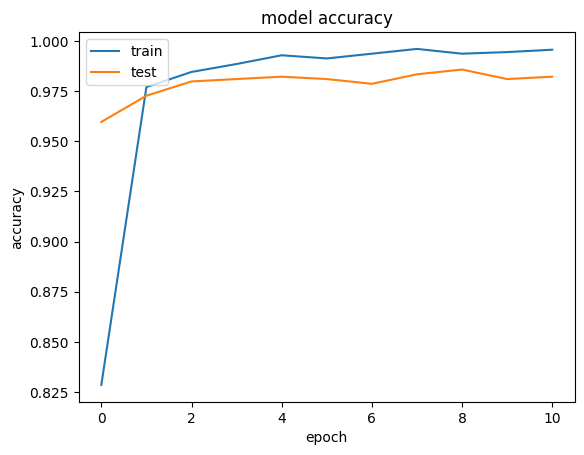

In [102]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

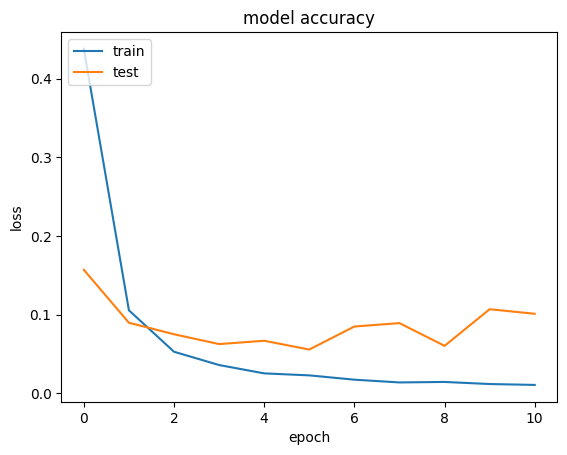

In [103]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
X_test.shape

(843, 170)

In [104]:
y_pred=classifier.predict(X_test)


27/27 [==============================] - 0s 4ms/step


In [105]:
y_pred=y_pred>0.5

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
y_test.shape

(843, 1)

In [108]:
y_pred.shape

(843, 1)

In [109]:
confusion_matrix(y_test,y_pred)

array([[830,   4],
       [  4,   5]])

In [114]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [115]:
classifier.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_07_24_14_07_41_.h5


In [110]:
#hyperparameter tunig with keras tuner

!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.4 MB/s eta 0:00:00


In [112]:
from kerastuner.tuners import RandomSearch

In [116]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=16,kernel_initializer = 'he_uniform',activation='relu',input_dim=170))
  model.add(Dense(units = 8, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [117]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault')

In [118]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 4 Complete [00h 00m 06s]
val_accuracy: 0.991696298122406

Best val_accuracy So Far: 0.991696298122406
Total elapsed time: 00h 00m 33s


In [119]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [120]:
mymodel=tuner.get_best_models(num_models=1)[0]

In [121]:
 mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2736      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [122]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [123]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project3',project_name='aps-fault-sensor')

In [124]:
tuner_second.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.9893238544464111

Best val_accuracy So Far: 0.9928825497627258
Total elapsed time: 00h 01m 12s


In [125]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units_0': 384,
 'units_1': 192,
 'learning_rate': 0.01,
 'units_2': 64,
 'units_3': 32,
 'units_4': 288,
 'units_5': 512,
 'units_6': 512,
 'units_7': 480,
 'units_8': 160,
 'units_9': 288,
 'units_10': 512,
 'units_11': 64,
 'units_12': 64,
 'units_13': 416,
 'units_14': 512,
 'units_15': 288}

In [126]:
classifier2=tuner_second.get_best_models(num_models=1)[0]